# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

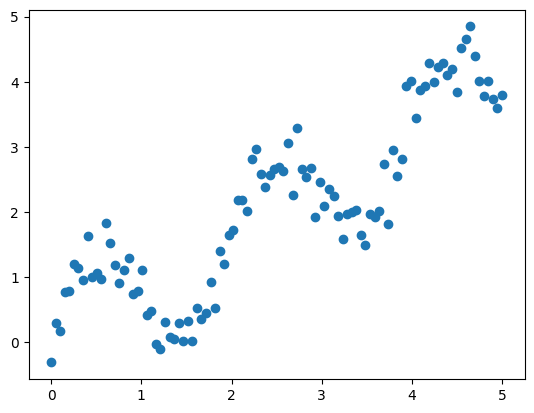

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.49771333424408254


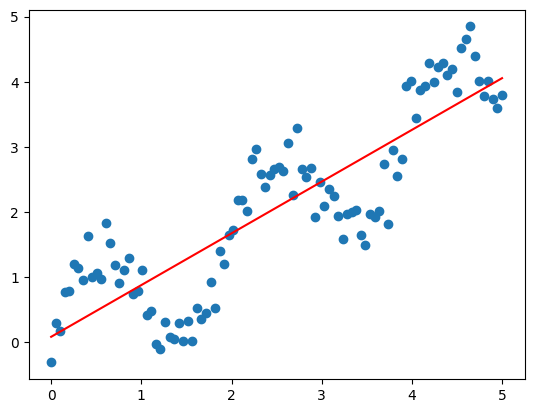

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

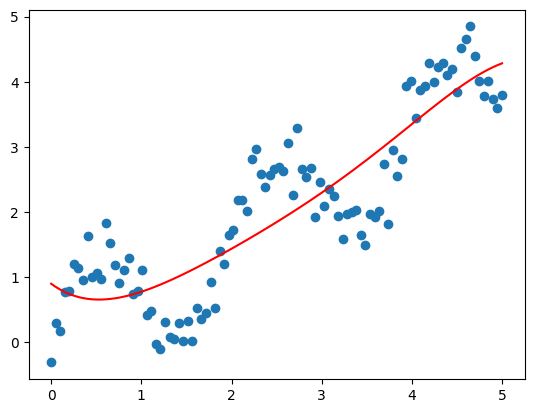

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.03253244  1.3179677  -0.49973447  0.09773514 -0.00736605]
interception:  0.896535736853306


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.89653574, 0.84768571, 0.80518187, 0.76866049, 0.7377725 ,
       0.71218322, 0.69157208, 0.67563232, 0.66407068, 0.65660717,
       0.65297469, 0.65291882, 0.65619747, 0.66258065, 0.67185012,
       0.68379913, 0.69823214, 0.71496449, 0.73382217, 0.75464144,
       0.77726865, 0.80155987, 0.8273806 , 0.85460553, 0.88311822,
       0.91281081, 0.94358371, 0.97534535, 1.00801187, 1.04150683,
       1.07576089, 1.1107116 , 1.146303  , 1.18248544, 1.21921521,
       1.25645426, 1.29416997, 1.33233477, 1.37092593, 1.40992522,
       1.44931862, 1.48909608, 1.52925115, 1.56978077, 1.61068492,
       1.65196635, 1.69363031, 1.73568423, 1.77813743, 1.82100086,
       1.86428678, 1.90800848, 1.95217997, 1.99681575, 2.04193043,
       2.08753853, 2.13365412, 2.18029055, 2.2274602 , 2.27517412,
       2.32344179, 2.37227082, 2.42166664, 2.47163223, 2.52216783,
       2.57327063, 2.62493451, 2.6771497 , 2.72990256, 2.78317522,
       2.83694533, 2.89118577, 2.94586433, 3.00094347, 3.05637

In [15]:
regr_poly.predict(X_poly)

array([0.89653574, 0.84768571, 0.80518187, 0.76866049, 0.7377725 ,
       0.71218322, 0.69157208, 0.67563232, 0.66407068, 0.65660717,
       0.65297469, 0.65291882, 0.65619747, 0.66258065, 0.67185012,
       0.68379913, 0.69823214, 0.71496449, 0.73382217, 0.75464144,
       0.77726865, 0.80155987, 0.8273806 , 0.85460553, 0.88311822,
       0.91281081, 0.94358371, 0.97534535, 1.00801187, 1.04150683,
       1.07576089, 1.1107116 , 1.146303  , 1.18248544, 1.21921521,
       1.25645426, 1.29416997, 1.33233477, 1.37092593, 1.40992522,
       1.44931862, 1.48909608, 1.52925115, 1.56978077, 1.61068492,
       1.65196635, 1.69363031, 1.73568423, 1.77813743, 1.82100086,
       1.86428678, 1.90800848, 1.95217997, 1.99681575, 2.04193043,
       2.08753853, 2.13365412, 2.18029055, 2.2274602 , 2.27517412,
       2.32344179, 2.37227082, 2.42166664, 2.47163223, 2.52216783,
       2.57327063, 2.62493451, 2.6771497 , 2.72990256, 2.78317522,
       2.83694533, 2.89118577, 2.94586433, 3.00094347, 3.05637

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

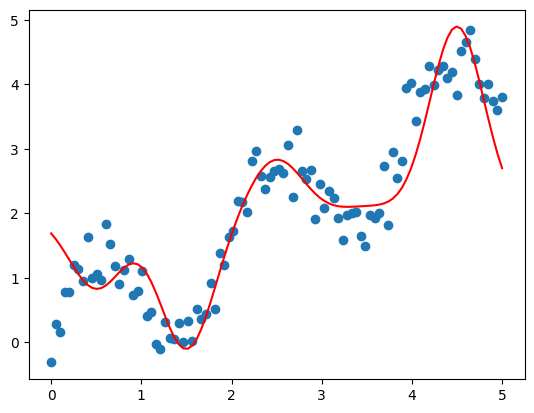

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.13630985 -2.07593903  0.86810395  0.12874497  2.92743627]
interception:  1.9719126241122205


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

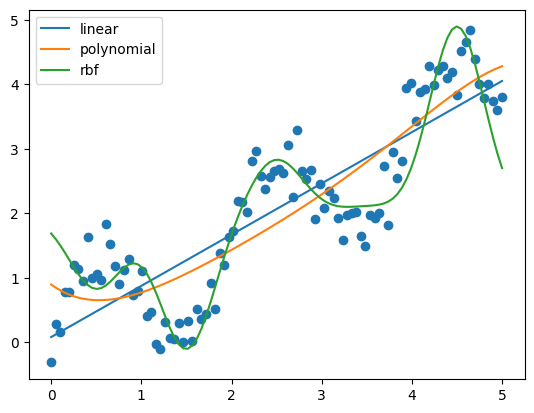

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.49771333424408254


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.44157388986714013


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2691795032361401
